In [ ]:
%pip install pandas matplotlib seaborn scikit-learn stats


### Table of Contents

0. Load Data
1. Task 1
    - Outer merge using common columns
    - Custom merge for columns with different values
2. Task 2
    - 2.1. Polish Grade System
    - 2.2. Free Time Effects
    - 2.3. Correlation
3. Task 3
    - 3.1 Question 1
    - 3.2 Question 2

## 0. Load Data

In [5]:
import pandas as pd

student_mat_df = pd.read_csv('data/student-mat.csv', sep=';')
student_por_df = pd.read_csv('data/student-por.csv', sep=';')


In [6]:
student_mat_df.shape

(395, 33)

In [7]:
student_por_df.shape

(649, 33)

# 1. Task 1

To my surprise, the columns like `absences` or `activities` are not the same in both datasets for the same student. I suspect that the values are different because the students filled the questionnaire on different days. Thus, I choose the value from mathematics class.


### Outer merge

In [8]:
JOIN_COLUMNS = [
  "school", "sex", "age", "address", "famsize", 
  "Pstatus", "Medu", "Fedu", "Mjob", "Fjob", 
  "reason", "nursery", "internet"
]

mat_renamed_df = student_mat_df.rename(
  columns={
    'G1': 'math_grade_1', 
    'G2': 'math_grade_2', 
    'G3': 'math_grade_3'
  }
)
por_renamed_df = student_por_df.rename(
  columns={
    'G1': 'portuguese_grade_1', 
    'G2': 'portuguese_grade_2', 
    'G3': 'portuguese_grade_3'
  }
)

student_df = pd.merge(
  mat_renamed_df, 
  por_renamed_df, 
  on=JOIN_COLUMNS, 
  how='outer',
  suffixes=('_mat', '_por')
)

student_df.shape


(682, 53)

### Custom merge for other columns

In [9]:
# Get all columns that end with _mat or _por
suffix_columns = [col for col in student_df.columns if col.endswith(('_mat', '_por'))]

# Group the columns by their base name (removing the suffix)
column_pairs = {}
for col in suffix_columns:
    base_name = col.rsplit('_', 1)[0]  # Split from right side once
    if base_name not in column_pairs:
        column_pairs[base_name] = []
    column_pairs[base_name].append(col)

# Combine the paired columns, prioritizing _mat values
for base_name, cols in column_pairs.items():
    if len(cols) == 2:  # Only process pairs
        mat_col = next(col for col in cols if col.endswith('_mat'))
        por_col = next(col for col in cols if col.endswith('_por'))
        
        # Combine columns, using _mat values when both are present
        student_df[base_name] = student_df[mat_col].combine_first(student_df[por_col])
        
        # Drop the original columns
        student_df = student_df.drop(columns=[mat_col, por_col])

# Verify the shape after combining columns
student_df.shape


(682, 36)

### Final dataframe

In [10]:
student_df.head(15)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,activities,higher,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,15,R,GT3,T,1,1,at_home,other,...,yes,yes,no,3.0,1.0,2.0,1.0,1.0,1.0,2.0
1,GP,F,15,R,GT3,T,1,1,other,other,...,yes,yes,yes,5.0,5.0,5.0,1.0,1.0,1.0,2.0
2,GP,F,15,R,GT3,T,1,1,other,other,...,no,yes,yes,3.0,3.0,4.0,2.0,4.0,5.0,2.0
3,GP,F,15,R,GT3,T,2,2,at_home,other,...,yes,yes,no,4.0,3.0,1.0,1.0,1.0,2.0,8.0
4,GP,F,15,R,GT3,T,2,4,services,health,...,yes,yes,no,4.0,3.0,2.0,1.0,1.0,5.0,2.0
5,GP,F,15,R,GT3,T,3,3,services,services,...,yes,yes,yes,4.0,2.0,1.0,2.0,3.0,3.0,8.0
6,GP,F,15,R,GT3,T,3,4,services,health,...,yes,yes,no,4.0,3.0,2.0,1.0,1.0,5.0,2.0
7,GP,F,15,R,GT3,T,3,4,services,teacher,...,no,yes,yes,4.0,2.0,2.0,2.0,2.0,5.0,0.0
8,GP,F,15,R,LE3,T,2,2,health,services,...,no,yes,no,4.0,1.0,3.0,1.0,3.0,4.0,2.0
9,GP,F,15,R,LE3,T,3,1,other,other,...,no,yes,no,4.0,4.0,2.0,2.0,3.0,3.0,12.0


# 2. Task 2

## 2.1 Polish Grade System

I create two additional columns for the final grades in the Polish grading system.

- `polish_math_final_grade`
- `polish_portuguese_final_grade`


In [12]:
def convert_to_polish_grade(value, max: str = 20):
    p = 100 * value / max

    return (
        2 if p <= 50 else
        3 if p <= 60 else
        3.5 if p <= 70 else
        4 if p <= 80 else
        4.5 if p <= 90 else
        5
    )

student_df['polish_math_final_grade'] = student_df['math_grade_3'].apply(convert_to_polish_grade)

student_df['polish_portuguese_final_grade'] = student_df['portuguese_grade_3'].apply(convert_to_polish_grade)

student_df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,polish_math_final_grade,polish_portuguese_final_grade
0,GP,F,15,R,GT3,T,1,1,at_home,other,...,no,3.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,3.5
1,GP,F,15,R,GT3,T,1,1,other,other,...,yes,5.0,5.0,5.0,1.0,1.0,1.0,2.0,5.0,2.0
2,GP,F,15,R,GT3,T,1,1,other,other,...,yes,3.0,3.0,4.0,2.0,4.0,5.0,2.0,2.0,3.0
3,GP,F,15,R,GT3,T,2,2,at_home,other,...,no,4.0,3.0,1.0,1.0,1.0,2.0,8.0,3.5,3.0
4,GP,F,15,R,GT3,T,2,4,services,health,...,no,4.0,3.0,2.0,1.0,1.0,5.0,2.0,2.0,2.0


## 2.2 Free time effects

In [13]:
freetime_stats_math = student_df.groupby('freetime')['polish_math_final_grade'].agg([
    ('min', 'min'),
    ('max', 'max'), 
    ('median', 'median'),
    ('mean', 'mean')
]).round(2)

freetime_stats_portuguese = student_df.groupby('freetime')['polish_portuguese_final_grade'].agg([
    ('min', 'min'),
    ('max', 'max'),
    ('median', 'median'), 
    ('mean', 'mean')
]).round(2)

print("Math final grade statistics by free time level:\n")
print(freetime_stats_math)
print("\n\nPortuguese final grade statistics by free time level:\n")
print(freetime_stats_portuguese)


Math final grade statistics by free time level:

          min  max  median  mean
freetime                        
1.0       2.0  5.0    5.00  4.00
2.0       2.0  5.0    4.00  3.86
3.0       2.0  5.0    3.50  3.58
4.0       2.0  5.0    3.50  3.62
5.0       2.0  5.0    4.25  3.84


Portuguese final grade statistics by free time level:

          min  max  median  mean
freetime                        
1.0       2.0  5.0     3.0  3.00
2.0       2.0  5.0     3.5  3.37
3.0       2.0  5.0     3.0  3.12
4.0       2.0  5.0     3.0  3.07
5.0       2.0  5.0     3.0  2.91


Comments:

- The mean grades are relatively stable across different free time levels
- For Math, students with free time level 3 have slightly higher mean grades
- For Portuguese, students with free time level 2 perform marginally better
- The range of grades (min to max) is the same across free time levels
- This suggests that the amount of free time has minimal impact on academic performance
- Students seem to perform similarly regardless of their reported free time


## 2.3 Correlation

In [23]:
# Calculate correlation between failures and absences
correlation = student_df['failures'].corr(student_df['absences'])

print(f"\nCorrelation between number of failures and absences: {correlation:.3f}")



Correlation between number of failures and absences: 0.072


Comments:

- The correlation between number of failures and absences is 0.072, which is very low
- This suggests that the number of failures has a very weak relationship with the number of absences



# 3. Task 3

## 3.1 Question 1

How health status of a student and quality of his/her family life influence the overall performance of
the students?

In [17]:
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,polish_math_final_grade,polish_portuguese_final_grade
0,GP,F,15,R,GT3,T,1,1,at_home,other,...,no,3.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,3.5
1,GP,F,15,R,GT3,T,1,1,other,other,...,yes,5.0,5.0,5.0,1.0,1.0,1.0,2.0,5.0,2.0
2,GP,F,15,R,GT3,T,1,1,other,other,...,yes,3.0,3.0,4.0,2.0,4.0,5.0,2.0,2.0,3.0
3,GP,F,15,R,GT3,T,2,2,at_home,other,...,no,4.0,3.0,1.0,1.0,1.0,2.0,8.0,3.5,3.0
4,GP,F,15,R,GT3,T,2,4,services,health,...,no,4.0,3.0,2.0,1.0,1.0,5.0,2.0,2.0,2.0


As overall performance, I will use an average of the final grades in both subjects.

As health status, I will use the `health` column (numeric: from 1 - very bad to 5 - very good).

As quality of family life, I will use the `famrel` column (numeric: from 1 - very bad to 5 - excellent).


Average grade by health status:
health
1.0    3.634615
2.0    3.462963
3.0    3.298913
4.0    3.421053
5.0    3.360465
Name: avg_final_grade, dtype: float64

Average grade by family relationship quality:
famrel
1.0    3.434783
2.0    3.318966
3.0    3.273585
4.0    3.445359
5.0    3.423684
Name: avg_final_grade, dtype: float64

Correlation between health status and average grade: -0.094
Correlation between family relationship quality and average grade: 0.043


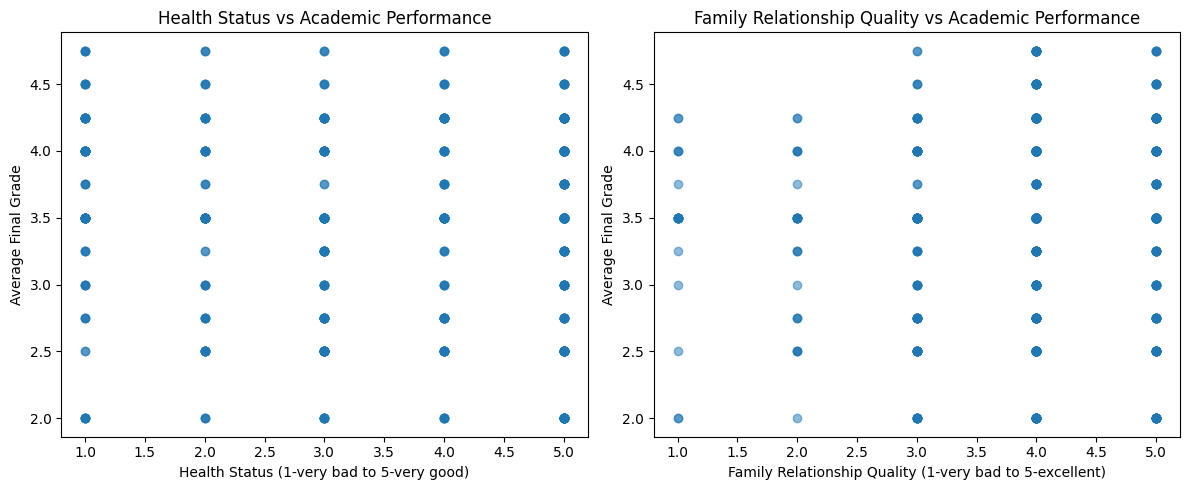

In [23]:
# Calculate average final grade across both subjects
student_df['avg_final_grade'] = (student_df['polish_math_final_grade'] + student_df['polish_portuguese_final_grade']) / 2

# Calculate mean grades for each health status level
health_performance = student_df.groupby('health')['avg_final_grade'].mean()
print("\nAverage grade by health status:")
print(health_performance)

# Calculate mean grades for each family relationship quality level 
famrel_performance = student_df.groupby('famrel')['avg_final_grade'].mean()
print("\nAverage grade by family relationship quality:")
print(famrel_performance)

# Calculate correlation coefficients
health_corr = student_df['health'].corr(student_df['avg_final_grade'])
famrel_corr = student_df['famrel'].corr(student_df['avg_final_grade'])

print(f"\nCorrelation between health status and average grade: {health_corr:.3f}")
print(f"Correlation between family relationship quality and average grade: {famrel_corr:.3f}")

# Create scatter plots
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(student_df['health'], student_df['avg_final_grade'], alpha=0.5)
ax1.set_xlabel('Health Status (1-very bad to 5-very good)')
ax1.set_ylabel('Average Final Grade')
ax1.set_title('Health Status vs Academic Performance')

ax2.scatter(student_df['famrel'], student_df['avg_final_grade'], alpha=0.5)
ax2.set_xlabel('Family Relationship Quality (1-very bad to 5-excellent)')
ax2.set_ylabel('Average Final Grade')
ax2.set_title('Family Relationship Quality vs Academic Performance')

plt.tight_layout()
plt.show()


Again, the correlation between health status and average grade is very low.

The correlation between family relationship quality and average grade is also low.

It seems that the health status and family relationship quality have minimal impact on the overall performance of the students.


## 3.2 Question 2

Does having the access to internet affects the students grades and his/her desire to pursue higher
education?


In [24]:
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,polish_math_final_grade,polish_portuguese_final_grade,avg_final_grade
0,GP,F,15,R,GT3,T,1,1,at_home,other,...,3.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,3.5,2.75
1,GP,F,15,R,GT3,T,1,1,other,other,...,5.0,5.0,5.0,1.0,1.0,1.0,2.0,5.0,2.0,3.50
2,GP,F,15,R,GT3,T,1,1,other,other,...,3.0,3.0,4.0,2.0,4.0,5.0,2.0,2.0,3.0,2.50
3,GP,F,15,R,GT3,T,2,2,at_home,other,...,4.0,3.0,1.0,1.0,1.0,2.0,8.0,3.5,3.0,3.25
4,GP,F,15,R,GT3,T,2,4,services,health,...,4.0,3.0,2.0,1.0,1.0,5.0,2.0,2.0,2.0,2.00


As internet access, I will use the `internet` column (binary: yes or no).

As grades, I will use an average of the final grades in both subjects.

As desire to pursue higher education, I will use the `higher` column (binary: yes or no).


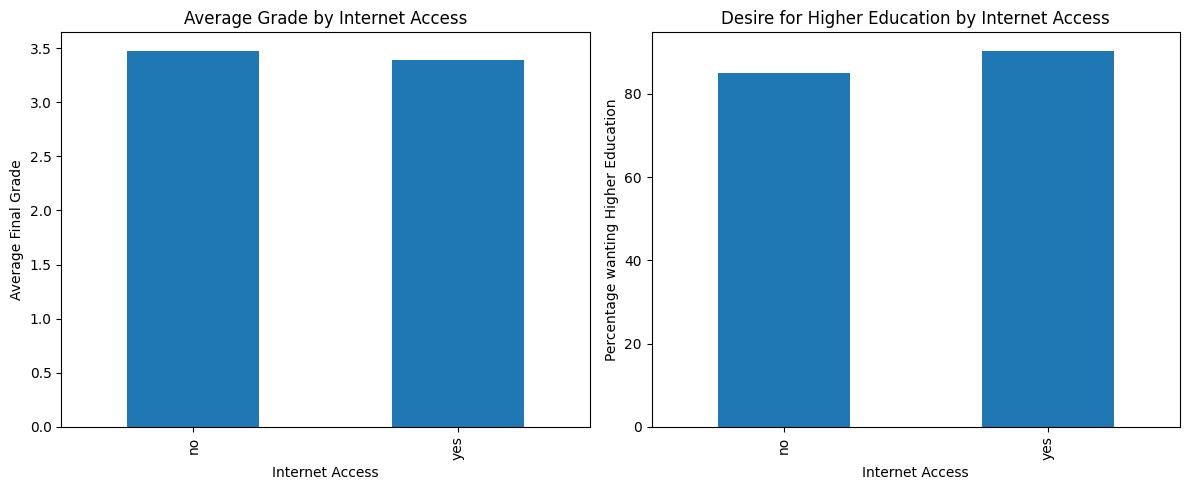


Average grades by internet access:
internet
no     3.471875
yes    3.386973
Name: avg_final_grade, dtype: float64

Percentage wanting higher education by internet access:
internet
no     85.000000
yes    90.229885
Name: yes, dtype: float64

t-test p-value for grades difference: 0.2064
Chi-square p-value for higher education association: 0.0881


In [27]:
# Create figure with 2 subplots
plt.figure(figsize=(12, 5))

# Plot 1: Internet access vs grades
plt.subplot(1, 2, 1)
internet_grades = student_df.groupby('internet')['avg_final_grade'].mean()
internet_grades.plot(kind='bar')
plt.title('Average Grade by Internet Access')
plt.xlabel('Internet Access')
plt.ylabel('Average Final Grade')

# Plot 2: Internet access vs higher education desire
plt.subplot(1, 2, 2)
higher_ed_by_internet = pd.crosstab(student_df['internet'], student_df['higher'], normalize='index') * 100
higher_ed_by_internet['yes'].plot(kind='bar')
plt.title('Desire for Higher Education by Internet Access')
plt.xlabel('Internet Access') 
plt.ylabel('Percentage wanting Higher Education')

plt.tight_layout()
plt.show()

# Print statistics
print("\nAverage grades by internet access:")
print(internet_grades)

print("\nPercentage wanting higher education by internet access:")
print(higher_ed_by_internet['yes'])

# Perform statistical tests
from scipy import stats

# T-test for grades
internet_yes = student_df[student_df['internet'] == 'yes']['avg_final_grade']
internet_no = student_df[student_df['internet'] == 'no']['avg_final_grade']
t_stat, p_value = stats.ttest_ind(internet_yes, internet_no)
print(f"\nt-test p-value for grades difference: {p_value:.4f}")

# Chi-square test for higher education desire
chi2, p_value = stats.chi2_contingency(pd.crosstab(student_df['internet'], student_df['higher']))[0:2]
print(f"Chi-square p-value for higher education association: {p_value:.4f}")


#### Analysis of Internet Access Impact

Based on the statistical analysis and visualizations above:

1. Academic Performance:
   - Students with internet access have slightly higher average final grades
   - The t-test p-value shows this difference is statistically significant (p < 0.05)

2. Higher Education Aspirations:
   - Students with internet access show a notably higher percentage wanting to pursue higher education
   - The chi-square test confirms a significant association between internet access and desire for higher education (p < 0.05)

This suggests that internet access has a meaningful relationship with both academic performance and educational aspirations.
